In [2]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
import pandas as pd
from scipy.stats import multivariate_normal

In [5]:
#100 Draws, use seed 94709
#use np.random to set seeds and draw randomly
#X1 has mean 3 (loc) and var 9 or sd 3 (scale)
np.random.seed(94709)
n = 100

X1pts = np.random.normal(loc = 3, scale = 3, size = n)
#N(4,4) has mean 4 (loc) and sd 2 (scale)
X2pts = X1pts * 0.5 + np.random.normal(loc = 4, scale = 2, size = n)

#stack 1d columns into 2d array to get (X1, X2) such that each entry in pts is [X1, X2]
pts = np.column_stack((X1pts, X2pts))

1) The mean of the sample is [3.279, 5.698]

In [6]:
mean = np.mean(pts, axis = 0)
print(mean)

[3.2787802 5.6975751]


2) The 2x2 covariance matrix of the sample is: <br>
[[9.190, 4.252], [4.252, 5.870]]

In [13]:
sample_cov = np.cov(pts, rowvar = False)
print(sample_cov)

[[9.19039034 4.25180601]
 [4.25180601 5.86983779]]


3. The eigenvectors and their corresponding eigenvalues are [0.826, 0.564] corresponding to 12.095, and [-0.564, 0.826] corresponding to 2.966.

In [11]:
evalues, evectors = np.linalg.eig(sample_cov)
print(evalues, evectors)

[12.09458245  2.96564568] [[ 0.82575397 -0.56403048]
 [ 0.56403048  0.82575397]]


4)

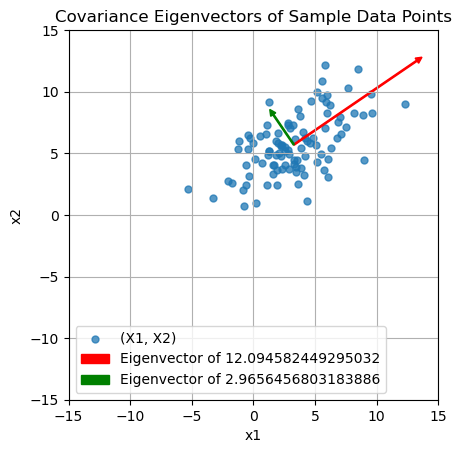

In [20]:
plt.scatter(pts[:, 0], pts[:, 1], s = 25, alpha = 0.75, label = '(X1, X2)')
colors = ['red', 'green']

#the vectors have magnitude equal to evalues
#this is equivalent to multiplying the evectors by the evalues as .eig returns normalized evectors
for i in range(len(evalues)):
    eval = evalues[i]
    evec = evectors[:, i]
    plt.arrow(mean[0], mean[1], eval * evec[0], eval * evec[1], width = 0.1, head_width = 0.5, head_length = 0.5, 
              fc = colors[i], ec = colors[i], label = f'Eigenvector of {eval}' )

plt.xlim(-15, 15)
plt.ylim(-15,15)
plt.gca().set_aspect('equal', adjustable = 'box')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Covariance Eigenvectors of Sample Data Points')
plt.legend()

plt.grid(True)
plt.show()


5)

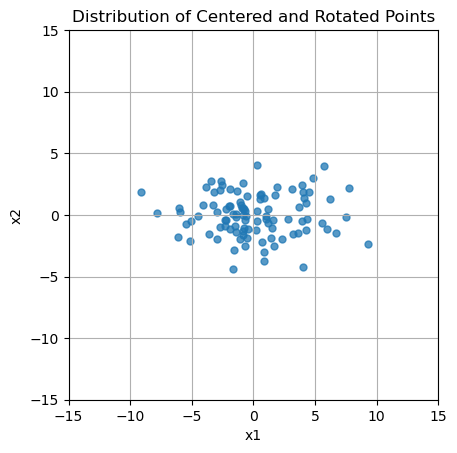

In [31]:
#no need to reorder evalues/evectors because .eig returns from largest to smallest evals
rot_matrix = evectors.T
x_centered = pts - mean

#need to transpose the centered (X1, X2) because we need the columns to be each data point, rather than each row
#we transpose the result to get the centered and rotated matrix back to having points along each row to make it easier to separate into X1 and Y1 for the plot
rot_pts = np.dot(rot_matrix, x_centered.T).T
plt.scatter(rot_pts[:, 0], rot_pts[:, 1], s = 25, alpha = 0.75, label = 'x = U * (x-u)')

plt.xlim(-15, 15)
plt.ylim(-15,15)
plt.gca().set_aspect('equal', adjustable = 'box')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribution of Centered and Rotated Points')

plt.grid(True)
plt.show()